In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


import os

In [13]:
data = pd.read_csv(r"D:\Machine-Learning\Data Science Tutorial\pokemon.csv") #for read local data I put r start of the direction
data.head()  #data.head brings us to first 5 examples of data

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [14]:
data.info()  #data.info brings the data types and how much null columns has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [15]:
data.corr()  #data.corr is the correlation. Which datas related which one. To understand this brings their rate each other.

#        HP    Attack   Defense   Sp. Atk   Sp. Def  \
#           1.000000  0.097712  0.102664  0.094691  0.089199  0.085596   
HP          0.097712  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.102664  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.094691  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.089199  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.085596  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.012181  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.983428  0.058683  0.051451  0.042419  0.036437  0.028486   
Legendary   0.154336  0.273620  0.345408  0.246377  0.448907  0.363937   

               Speed  Generation  Legendary  
#           0.012181    0.983428   0.154336  
HP          0.175952    0.058683   0.273620  
Attack      0.381240    0.051451   0.345408  
Defense     0.015227    0.042419   0.246377  
Sp. Atk     0.473018    0.036437   0.448907  
Sp. Def     0.259133    0.028486   0.363937  
Speed       1.000000   -0.023121   0.326715  
Generation -0.023121    1.000000   0.079794  
Legendary   0.326715    0.079794   1.000000

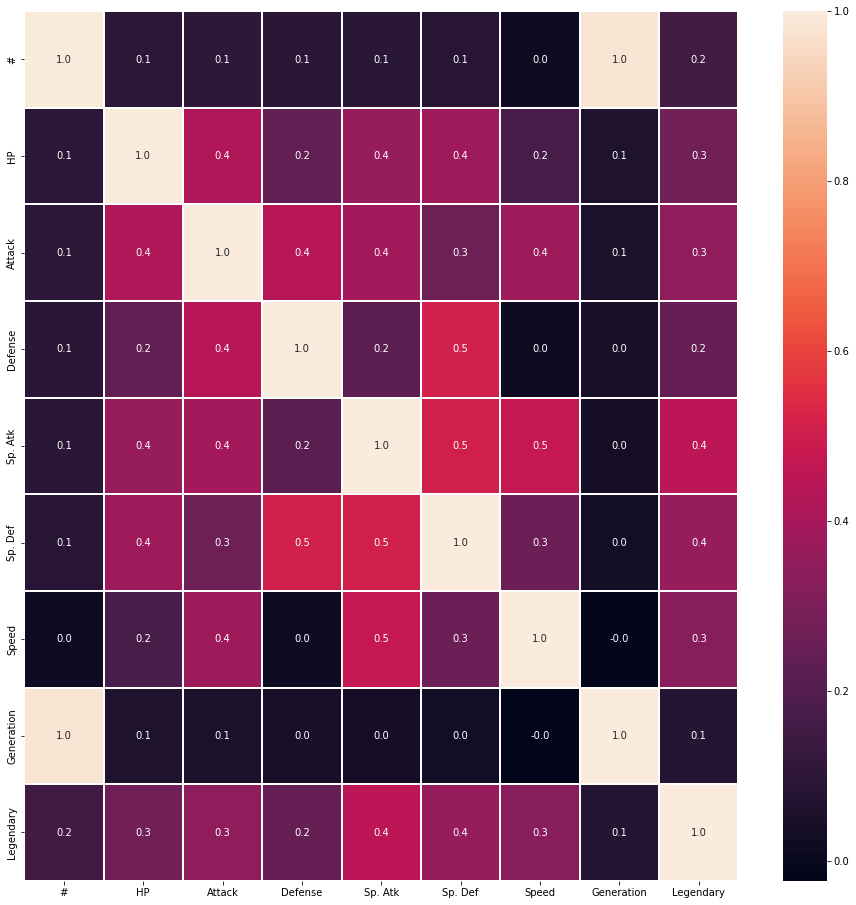

In [16]:
#correlation map
f,ax = plt.subplots(figsize=(16, 16)) # change the image size
sns.heatmap(data.corr(), annot=True, linewidths=.1, fmt= '.1f',ax=ax)
plt.show() #print the heatmap

#heatmap first parameter is data, second one is rate in the middle of boxes, third space from each boxes, fourth is much digit 
# going to write in the middle of boxes

In [17]:
data.head(10)

#              Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   1         Bulbasaur  Grass  Poison  45      49       49       65       65   
1   2           Ivysaur  Grass  Poison  60      62       63       80       80   
2   3          Venusaur  Grass  Poison  80      82       83      100      100   
3   4     Mega Venusaur  Grass  Poison  80     100      123      122      120   
4   5        Charmander   Fire     NaN  39      52       43       60       50   
5   6        Charmeleon   Fire     NaN  58      64       58       80       65   
6   7         Charizard   Fire  Flying  78      84       78      109       85   
7   8  Mega Charizard X   Fire  Dragon  78     130      111      130       85   
8   9  Mega Charizard Y   Fire  Flying  78     104       78      159      115   
9  10          Squirtle  Water     NaN  44      48       65       50       64   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
5     80           1      False  
6    100           1      False  
7    100           1      False  
8    100           1      False  
9     43           1      False

In [18]:
data.columns #prints all columns in the data

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

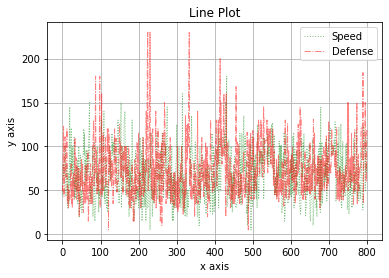

In [19]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.Speed.plot(kind = 'line', color = 'g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(color = 'r',label = 'Defense',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()
# x axis is # number of data, y axis value of speed and defense

Text(0.5, 1.0, 'Attack Defense Scatter Plot')

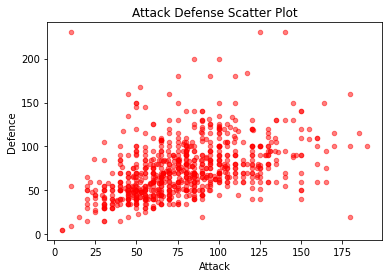

In [20]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='Attack', y='Defense',alpha = 0.5,color = 'red')
plt.xlabel('Attack')              # label = name of label
plt.ylabel('Defence')
plt.title('Attack Defense Scatter Plot')            # title = title of plot

#prints the all datas both speed and attack values

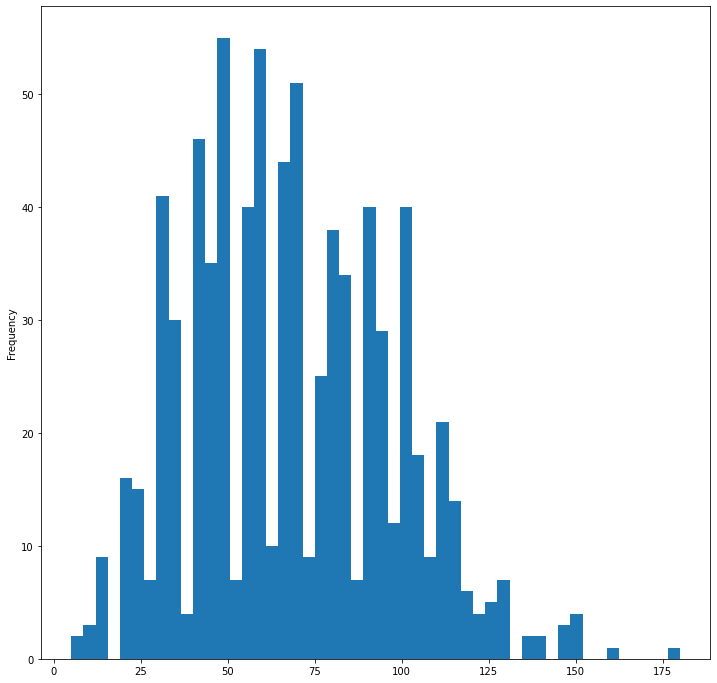

In [21]:
# Histogram
# bins = number of bar in figure
data.Speed.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

#divided all values to bins which 50 in there. Then prints the frequency of each area

In [22]:
# clf() = cleans it up again you can start a fresh
data.Speed.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

# clf deletes the histograms

<Figure size 432x288 with 0 Axes>

In [23]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [24]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"       # Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)

{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [25]:
#PANDAS
series = data['Defense']        # data['Defense'] = series
print(type(series))
data_frame = data[['Defense']]  # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [27]:
# 1 - Filtering Pandas data frame
x = data['Defense']>200     # There are only 3 pokemons who have higher defense value than 200
data[x]

#          Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
224  225  Mega Steelix  Steel  Ground  75     125      230       55       95   
230  231       Shuckle    Bug    Rock  20      10      230       10      230   
333  334   Mega Aggron  Steel     NaN  70     140      230       60       80   

     Speed  Generation  Legendary  
224     30           2      False  
230      5           2      False  
333     50           3      False

In [28]:
# 2 - Filtering pandas with logical_and
# There are only 2 pokemons who have higher defence value than 2oo and higher attack value than 100
data[np.logical_and(data['Defense']>200, data['Attack']>100 )]

#          Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
224  225  Mega Steelix  Steel  Ground  75     125      230       55       95   
333  334   Mega Aggron  Steel     NaN  70     140      230       60       80   

     Speed  Generation  Legendary  
224     30           2      False  
333     50           3      False

In [29]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['Defense']>200) & (data['Attack']>100)]

#          Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
224  225  Mega Steelix  Steel  Ground  75     125      230       55       95   
333  334   Mega Aggron  Steel     NaN  70     140      230       60       80   

     Speed  Generation  Legendary  
224     30           2      False  
333     50           3      False

In [30]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [31]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['Attack']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  Attack    49
Name: 0, dtype: int64


In [32]:
# example of what we learn above
def tuple_ex():
    """ return defined t tuple"""
    t = (1,2,3)
    return t
a,b,c = tuple_ex()
print(a,b,c)

1 2 3


In [33]:
# guess prints what
x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

2
3


In [34]:
# What if there is no local scope
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x  
# First local scope searched, then global scope searched, if two of them cannot be found lastly built in scope searched.

10


In [35]:
# How can we learn what is built in scope
import builtins
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [36]:
#nested function
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2

In [37]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(5))
# what if we want to change default arguments
print(f(5,4,3))

8
12


In [38]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

1

1
2
3
4
country   spain
capital   madrid
population   123456


In [39]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


In [40]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]


In [41]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)         # print remaining iteration

r
o n a l d o


In [42]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [43]:
un_zip = zip(*z_list)
un_list1,un_list2 = list(un_zip) # unzip returns tuple
print(un_list1)
print(un_list2)
print(type(un_list2))

(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


In [44]:
# Example of list comprehension
num1 = [1,2,3]
num2 = [i + 1 for i in num1 ]
print(num2)

[2, 3, 4]


In [45]:
# Conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [46]:
# lets return pokemon csv and make one more list comprehension example
# lets classify pokemons whether they have high or low speed. Our threshold is average speed.
threshold = sum(data.Speed)/len(data.Speed)
data["speed_level"] = ["high" if i > threshold else "low" for i in data.Speed]
data.loc[:10,["speed_level","Speed"]] # we will learn loc more detailed later

speed_level  Speed
0          low     45
1          low     60
2         high     80
3         high     80
4          low     65
5         high     80
6         high    100
7         high    100
8         high    100
9          low     43
10         low     58

In [47]:

#	Name	Type 1	Type 2	HP	Attack	Defense	Sp. Atk	Sp. Def	Speed	Generation	Legendary
0	1	Bulbasaur	Grass	Poison	45	49	49	65	65	45	1	False
1	2	Ivysaur	Grass	Poison	60	62	63	80	80	60	1	False
2	3	Venusaur	Grass	Poison	80	82	83	100	100	80	1	False
3	4	Mega Venusaur	Grass	Poison	80	100	123	122	120	80	1	False
4	5	Charmander	Fire	NaN	39	52	43	60	50	65	1	False
# tail shows last 5 rows
data.tail()

SyntaxError: invalid syntax (Temp/ipykernel_3568/4265002390.py, line 2)

In [48]:
print(data['Type 1'].value_counts(dropna =False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [49]:
data.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

<AxesSubplot:title={'center':'Attack'}, xlabel='Legendary'>

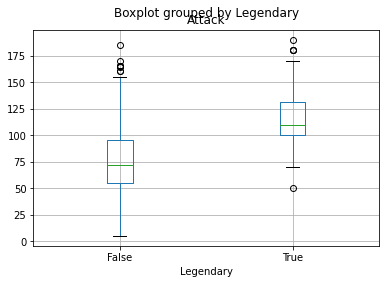

In [50]:
data.boxplot(column='Attack',by = 'Legendary')

In [51]:
data_new = data.head()    # I only take 5 rows into new data
data_new

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary speed_level  
0     45           1      False         low  
1     60           1      False         low  
2     80           1      False        high  
3     80           1      False        high  
4     65           1      False         low

In [52]:
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

Name variable  value
0      Bulbasaur   Attack     49
1        Ivysaur   Attack     62
2       Venusaur   Attack     82
3  Mega Venusaur   Attack    100
4     Charmander   Attack     52
5      Bulbasaur  Defense     49
6        Ivysaur  Defense     63
7       Venusaur  Defense     83
8  Mega Venusaur  Defense    123
9     Charmander  Defense     43

In [53]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable       Attack  Defense
Name                          
Bulbasaur          49       49
Charmander         52       43
Ivysaur            62       63
Mega Venusaur     100      123
Venusaur           82       83

In [54]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

#            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0    1       Bulbasaur    Grass  Poison  45      49       49       65   
1    2         Ivysaur    Grass  Poison  60      62       63       80   
2    3        Venusaur    Grass  Poison  80      82       83      100   
3    4   Mega Venusaur    Grass  Poison  80     100      123      122   
4    5      Charmander     Fire     NaN  39      52       43       60   
5  796         Diancie     Rock   Fairy  50     100      150      100   
6  797    Mega Diancie     Rock   Fairy  50     160      110      160   
7  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
8  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
9  800       Volcanion     Fire   Water  80     110      120      130   

   Sp. Def  Speed  Generation  Legendary speed_level  
0       65     45           1      False         low  
1       80     60           1      False         low  
2      100     80           1      False        high  
3      120     80           1      False        high  
4       50     65           1      False         low  
5      150     50           6       True         low  
6      110    110           6       True        high  
7      130     70           6       True        high  
8      130     80           6       True        high  
9       90     70           6       True        high

In [55]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 1 : adds dataframes in column
conc_data_col

Attack  Defense
0      49       49
1      62       63
2      82       83
3     100      123
4      52       43

In [56]:
data.dtypes

#               int64
Name           object
Type 1         object
Type 2         object
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
speed_level    object
dtype: object

In [57]:
# lets convert object(str) to categorical and int to float.
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [58]:
data.dtypes

#                 int64
Name             object
Type 1         category
Type 2           object
HP                int64
Attack            int64
Defense           int64
Sp. Atk           int64
Sp. Def           int64
Speed           float64
Generation        int64
Legendary          bool
speed_level      object
dtype: object

In [59]:
data["Type 2"].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [61]:
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True) 

In [64]:
assert 1==1

In [65]:
assert  data['Type 2'].notnull().all()

In [66]:
data["Type 2"].fillna('empty',inplace = True)

In [68]:
assert  data['Type 2'].notnull().all() 

In [ ]:
#Pandas

In [69]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

country population
0   Spain         11
1  France         12

In [70]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

country population capital
0   Spain         11  madrid
1  France         12   paris

In [71]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

country population capital  income
0   Spain         11  madrid       0
1  France         12   paris       0

In [72]:
#Visualize

<AxesSubplot:>

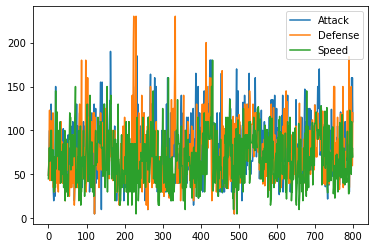

In [73]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

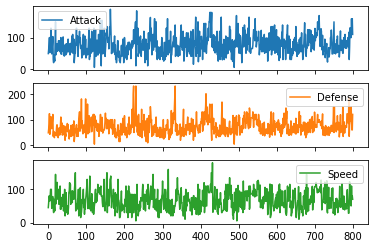

In [74]:
data1.plot(subplots = True)
plt.show()

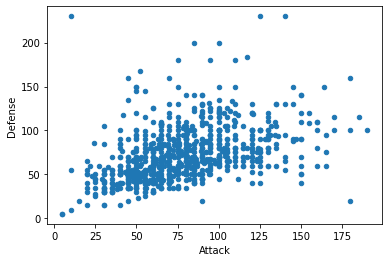

In [75]:
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

<AxesSubplot:ylabel='Frequency'>

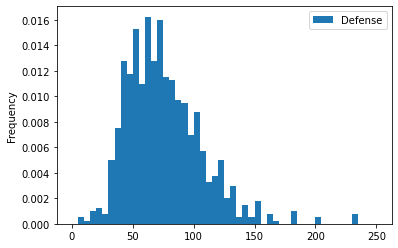

In [80]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density  = True)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

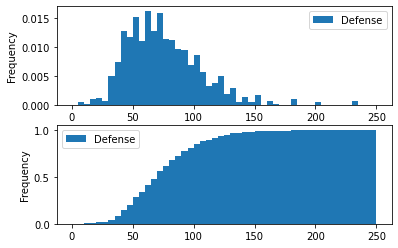

In [82]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),density = True,ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

In [84]:
data.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

In [85]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [86]:
# close warning
import warnings
warnings.filterwarnings("ignore")
# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
# lets make date as index
data2= data2.set_index("date")
data2 

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-01-10  1      Bulbasaur  Grass  Poison  45      49       49       65   
1992-02-10  2        Ivysaur  Grass  Poison  60      62       63       80   
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire   empty  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary speed_level  
date                                                           
1992-01-10       65   45.0           1      False         low  
1992-02-10       80   60.0           1      False         low  
1992-03-10      100   80.0           1      False        high  
1993-03-15      120   80.0           1      False        high  
1993-03-16       50   65.0           1      False         low

In [87]:
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                       5
Name           Charmander
Type 1               Fire
Type 2              empty
HP                     39
Attack                 52
Defense                43
Sp. Atk                60
Sp. Def                50
Speed                65.0
Generation              1
Legendary           False
speed_level           low
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire   empty  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary speed_level  
date                                                           
1992-03-10      100   80.0           1      False        high  
1993-03-15      120   80.0           1     

In [92]:
data2.resample("A").mean()

#         HP     Attack  Defense    Sp. Atk    Sp. Def  \
date                                                                   
1992-12-31  2.0  61.666667  64.333333     65.0  81.666667  81.666667   
1993-12-31  4.5  59.500000  76.000000     83.0  91.000000  85.000000   

                Speed  Generation  Legendary  
date                                          
1992-12-31  61.666667         1.0        0.0  
1993-12-31  72.500000         1.0        0.0

In [89]:
data2.resample("M").mean()

#    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
date                                                                          
1992-01-31  1.0  45.0    49.0     49.0     65.0     65.0   45.0         1.0   
1992-02-29  2.0  60.0    62.0     63.0     80.0     80.0   60.0         1.0   
1992-03-31  3.0  80.0    82.0     83.0    100.0    100.0   80.0         1.0   
1992-04-30  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-05-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-06-30  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-07-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-08-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-09-30  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-10-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-11-30  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1992-12-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1993-01-31  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1993-02-28  NaN   NaN     NaN      NaN      NaN      NaN    NaN         NaN   
1993-03-31  4.5  59.5    76.0     83.0     91.0     85.0   72.5         1.0   

            Legendary  
date                   
1992-01-31        0.0  
1992-02-29        0.0  
1992-03-31        0.0  
1992-04-30        NaN  
1992-05-31        NaN  
1992-06-30        NaN  
1992-07-31        NaN  
1992-08-31        NaN  
1992-09-30        NaN  
1992-10-31        NaN  
1992-11-30        NaN  
1992-12-31        NaN  
1993-01-31        NaN  
1993-02-28        NaN  
1993-03-31        0.0

In [94]:
data2.resample("M").mean().interpolate("linear")

#         HP  Attack  Defense  Sp. Atk  Sp. Def   Speed  \
date                                                                      
1992-01-31  1.000  45.000000    49.0     49.0    65.00    65.00  45.000   
1992-02-29  2.000  60.000000    62.0     63.0    80.00    80.00  60.000   
1992-03-31  3.000  80.000000    82.0     83.0   100.00   100.00  80.000   
1992-04-30  3.125  78.291667    81.5     83.0    99.25    98.75  79.375   
1992-05-31  3.250  76.583333    81.0     83.0    98.50    97.50  78.750   
1992-06-30  3.375  74.875000    80.5     83.0    97.75    96.25  78.125   
1992-07-31  3.500  73.166667    80.0     83.0    97.00    95.00  77.500   
1992-08-31  3.625  71.458333    79.5     83.0    96.25    93.75  76.875   
1992-09-30  3.750  69.750000    79.0     83.0    95.50    92.50  76.250   
1992-10-31  3.875  68.041667    78.5     83.0    94.75    91.25  75.625   
1992-11-30  4.000  66.333333    78.0     83.0    94.00    90.00  75.000   
1992-12-31  4.125  64.625000    77.5     83.0    93.25    88.75  74.375   
1993-01-31  4.250  62.916667    77.0     83.0    92.50    87.50  73.750   
1993-02-28  4.375  61.208333    76.5     83.0    91.75    86.25  73.125   
1993-03-31  4.500  59.500000    76.0     83.0    91.00    85.00  72.500   

            Generation  Legendary  
date                               
1992-01-31         1.0        0.0  
1992-02-29         1.0        0.0  
1992-03-31         1.0        0.0  
1992-04-30         1.0        0.0  
1992-05-31         1.0        0.0  
1992-06-30         1.0        0.0  
1992-07-31         1.0        0.0  
1992-08-31         1.0        0.0  
1992-09-30         1.0        0.0  
1992-10-31         1.0        0.0  
1992-11-30         1.0        0.0  
1992-12-31         1.0        0.0  
1993-01-31         1.0        0.0  
1993-02-28         1.0        0.0  
1993-03-31         1.0        0.0

In [96]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

#         HP  Attack  Defense  Sp. Atk  Sp. Def   Speed  \
date                                                                      
1992-01-31  1.000  45.000000    49.0     49.0    65.00    65.00  45.000   
1992-02-29  2.000  60.000000    62.0     63.0    80.00    80.00  60.000   
1992-03-31  3.000  80.000000    82.0     83.0   100.00   100.00  80.000   
1992-04-30  3.125  78.291667    81.5     83.0    99.25    98.75  79.375   
1992-05-31  3.250  76.583333    81.0     83.0    98.50    97.50  78.750   
1992-06-30  3.375  74.875000    80.5     83.0    97.75    96.25  78.125   
1992-07-31  3.500  73.166667    80.0     83.0    97.00    95.00  77.500   
1992-08-31  3.625  71.458333    79.5     83.0    96.25    93.75  76.875   
1992-09-30  3.750  69.750000    79.0     83.0    95.50    92.50  76.250   
1992-10-31  3.875  68.041667    78.5     83.0    94.75    91.25  75.625   
1992-11-30  4.000  66.333333    78.0     83.0    94.00    90.00  75.000   
1992-12-31  4.125  64.625000    77.5     83.0    93.25    88.75  74.375   
1993-01-31  4.250  62.916667    77.0     83.0    92.50    87.50  73.750   
1993-02-28  4.375  61.208333    76.5     83.0    91.75    86.25  73.125   
1993-03-31  4.500  59.500000    76.0     83.0    91.00    85.00  72.500   

            Generation  Legendary  
date                               
1992-01-31         1.0        0.0  
1992-02-29         1.0        0.0  
1992-03-31         1.0        0.0  
1992-04-30         1.0        0.0  
1992-05-31         1.0        0.0  
1992-06-30         1.0        0.0  
1992-07-31         1.0        0.0  
1992-08-31         1.0        0.0  
1992-09-30         1.0        0.0  
1992-10-31         1.0        0.0  
1992-11-30         1.0        0.0  
1992-12-31         1.0        0.0  
1993-01-31         1.0        0.0  
1993-02-28         1.0        0.0  
1993-03-31         1.0        0.0